In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Funciones**

In [138]:
def f_1(x):
    # Función: f(x,y) = x^4 + y^4 - 4xy + 0.5y + 1
    return x[0]**4 + x[1]**4 -4*x[0]*x[1] + 0.5*x[1]+1  

def df_1(x):
    df_1dx = 4*x[0]**3-4*x[1]
    df_1dy = 4*x[1]**3-4*x[0] + 0.5
    return np.array([df_1dx, df_1dy])

def ddf_1(x):
    ddf_1ddx = 12*x[0]**2-4
    ddf_1dxdy = -4
    ddf_1ddy = 12*x[1]**2
    return np.array([[ddf_1ddx, ddf_1dxdy],[ddf_1dxdy, ddf_1ddy]])

def f_2(x):
    # funcion: f(x1,x2) = 100(x2-x1²)² + (1-x1)²
    return 100*((x[1]-x[0]**2)**2) + (1- x[0])**2

def df_2(x):
    df_2dx1 = -400*x[0]*(x[1]-x[0]**2)-2*(1-x[0])
    df_2dx2 = 200*(x[1]-x[0]**2)
    return np.array([df_2dx1, df_2dx2])

def ddf_2(x):
    ddf_2ddx1 = 1200*x[0]**2-400*x[1]+2
    ddf_2dx1dx2 = -400*x[0]
    ddf_2ddx2 = 200
    return np.array([[ddf_2ddx1, ddf_2dx1dx2],[ddf_2dx1dx2, ddf_2ddx2]])

def f_3(x):
    n = len(x)
    total = []
    for i in range (n-1):
        fx = 100*((x[i+1] - x[i]**2)**2) + (1-x[i])**2
        total.append(fx)
    return sum(total)

def df_3(x):
    n = len(x)
    jacobian = []

    for i in range(n-1):
        dfdx = 200 * (x[i + 1] - x[i] ** 2) * (-2 * x[i]) - 2 * (1 - x[i])
        jacobian.append(dfdx)

    x_final = 200 * (x[-1] - x[-2]**2)
    jacobian.append(x_final)
    
    return np.array(jacobian)
    
def ddf_3(x):
    n = len(x)
    hessian = np.zeros((n, n))

    for i in range(n):
        # Diagonal
        hessian[i, i] = 1200 * x[i]**2 - 400 * x[(i + 1) % n] + 2

        # Off-diagonal +/- 1
        hessian[i, (i + 1) % n] = -400 * x[i]
        hessian[(i + 1) % n, i] = -400 * x[i]

    hessian[-1,-1] = 200
    return hessian

**A) Algoritmo de descenso gradiante naïve con dirección de descenso aleatoria**

In [244]:
def gradient_descent_naive(f, df, x0, alpha, max_iterations=1000, tolerance=1e-4):
    x = x0
    iter = 0
    val = 'NO'
    best_x = x
    f_iter_seq = [x]
    f_x_iter_seq = [f(x)]
    error_seq = [0]

    while iter < max_iterations:
        gradient = df(x)
        normalized_gradient = df(x) / np.linalg.norm(df(x))
        random_direction = np.random.rand(*x.shape)  # Generar una dirección de descenso aleatoria
        normalized_random_direction = random_direction / np.linalg.norm(random_direction)

        # Verificar si el ángulo entre normalized_gradient y normalized_random_direction está en [0, pi/2] radianes
        if 0 <= np.arccos(np.dot(normalized_gradient, normalized_random_direction) / (np.linalg.norm(normalized_gradient) * \
                                                                                      np.linalg.norm(normalized_random_direction))) <= np.pi/2:
            # Si cumple baja en esta dirección
            descent_direction = -normalized_random_direction
        else:
            # Usar un submultiplo de la dirección del gradiente si no cumple con la condición
            t = random.random()
            descent_direction = -t * normalized_gradient  

        x_next = x + alpha * descent_direction
        f_iter_seq.append(x_next)
        f_x_iter_seq.append(f(x_next))
        error_seq.append(np.linalg.norm(gradient))

        if np.linalg.norm(df(x_next)) < np.linalg.norm(df(x)):
            best_x = x_next

        if np.linalg.norm(gradient) < tolerance:
            best_x = x_next
            val = 'SÍ'
            break

        x = x_next
        iter += 1

    print('Número de iteraciones = ' + str(iter), '\nEl algoritmo ' + val + ' convergió')
    print('Vector seleccionado: ' + str(best_x))
    print('Valor mínimo alcanzado: ' + str(f(best_x)))
    print('Error mínimo alcanzado: ' + str(error_seq[-1]))
    return best_x, f_iter_seq, f_x_iter_seq, error_seq

In [245]:
f_1_a_initial_guess = np.array([3.0, 1.0])
f_1_b_initial_guess = np.array([-3.0, 1.0])
f_1_min_abs = [-1.01463,-1.04453]
f_1_step_rate = 0.01
f_1_max_iterations = 50000
f_1_a_tolerance = 1e-4
f_1_b_tolerance = 1e-4

In [246]:
best_x_f_1_a, f_iter_seq_f_1_a, f_x_iter_seq_f_1_a, \
    error_seq_f_1_a = gradient_descent_naive(f_1, df_1, f_1_a_initial_guess, f_1_step_rate, f_1_max_iterations, f_1_a_tolerance)

Número de iteraciones = 30088 
El algoritmo SÍ convergió
Vector seleccionado: [-1.01276854 -1.0428087 ]
Valor mínimo alcanzado: -1.5112915317846958
Error mínimo alcanzado: 7.839698655743386e-05


In [247]:
best_x_f_1_b, f_iter_seq_f_1_b, f_x_iter_seq_f_1_b, \
    error_seq_f_1_b = gradient_descent_naive(f_1, df_1, f_1_b_initial_guess, f_1_step_rate, f_1_max_iterations, f_1_b_tolerance)

Número de iteraciones = 44232 
El algoritmo SÍ convergió
Vector seleccionado: [-1.02458628 -1.04540264]
Valor mínimo alcanzado: -1.5107327037871783
Error mínimo alcanzado: 6.054748224865245e-05


In [111]:
def plot_function_2d(f, x_range=(0,1), y_range=(0, 1), num_points=100, levels=20, figsize=(8, 8), show=True, points=None, title=None):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = f(np.array([X[i, j], Y[i, j]]))

    fig=plt.figure(figsize=figsize)
    plt.contour(X, Y, Z, levels=levels)
    plt.colorbar()

    if title is not None:
        plt.title(title)
        
    if points is not None:
        x_points = [point[0] for point in points]
        y_points = [point[1] for point in points]
        plt.plot(x_points, y_points, 'ro', markersize=0.5, label='Optimization Path')
        plt.legend()

    if show:
        plt.show(fig)
    else:
        plt.close(fig)

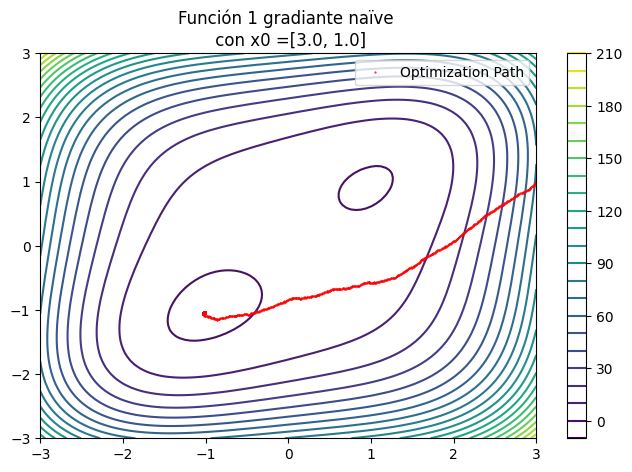

In [248]:
plot_function_2d(f_1, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, points=f_iter_seq_f_1_a, title='Función 1 gradiante naïve \n con x0 =[3.0, 1.0]')

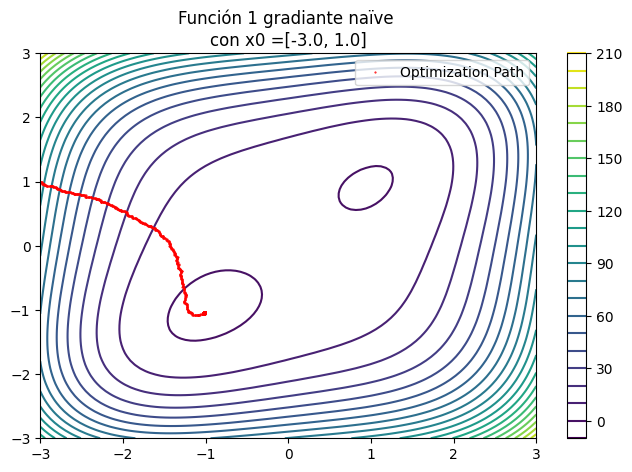

In [249]:
plot_function_2d(f_1, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, points=f_iter_seq_f_1_b, title='Función 1 gradiante naïve \ncon x0 =[-3.0, 1.0]')

In [250]:
f_2_initial_guess = np.array([1.2, 1.0])
f_2_min_abs = np.array([1.0, 1.0])
f_2_step_rate = 0.01
f_2_max_iterations = 100000
f_2_tolerance = 1e-2

In [251]:
best_x_f_2, f_iter_seq_f_2, f_x_iter_seq_f_2, \
    error_seq_f_2 = gradient_descent_naive(f_2, df_2, f_2_initial_guess, f_2_step_rate, f_2_max_iterations, f_2_tolerance)

Número de iteraciones = 100000 
El algoritmo NO convergió
Vector seleccionado: [0.67972532 0.46039514]
Valor mínimo alcanzado: 0.10284200694544106
Error mínimo alcanzado: 0.4334452894601944


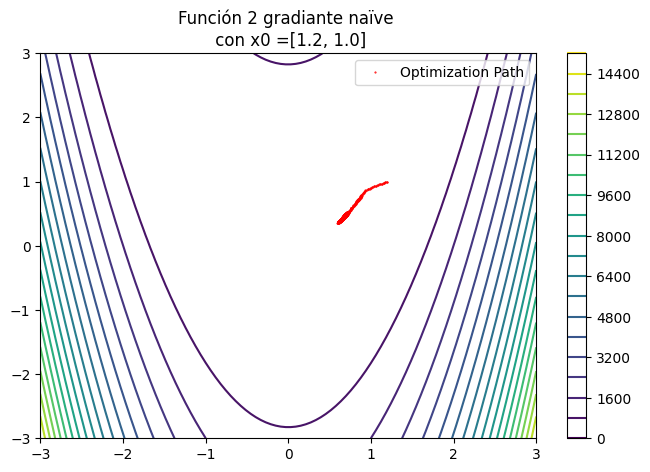

In [252]:
plot_function_2d(f_2, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, points=f_iter_seq_f_2, title='Función 2 gradiante naïve \n con x0 =[1.2, 1.0]')

In [150]:
f_3_initial_guess = np.array([1.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.2, 1.0])
f_3_min_abs = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,])
f_3_step_rate = 0.001
f_3_max_iterations = 100000
f_3_tolerance = 1e-4

In [254]:
best_x_f_3, f_iter_seq_f_3, f_x_iter_seq_f_3, \
    error_seq_f_3 = gradient_descent_naive(f_3, df_3, f_3_initial_guess, f_3_step_rate, f_3_max_iterations, f_3_tolerance)

Número de iteraciones = 100000 
El algoritmo NO convergió
Vector seleccionado: [0.99982177 0.99965059 0.99909225 0.99838583 0.99685531 0.99398539
 0.98804509 0.97610225 0.95293057 0.90795181]
Valor mínimo alcanzado: 0.0030010885942014735
Error mínimo alcanzado: 0.2083726649888257


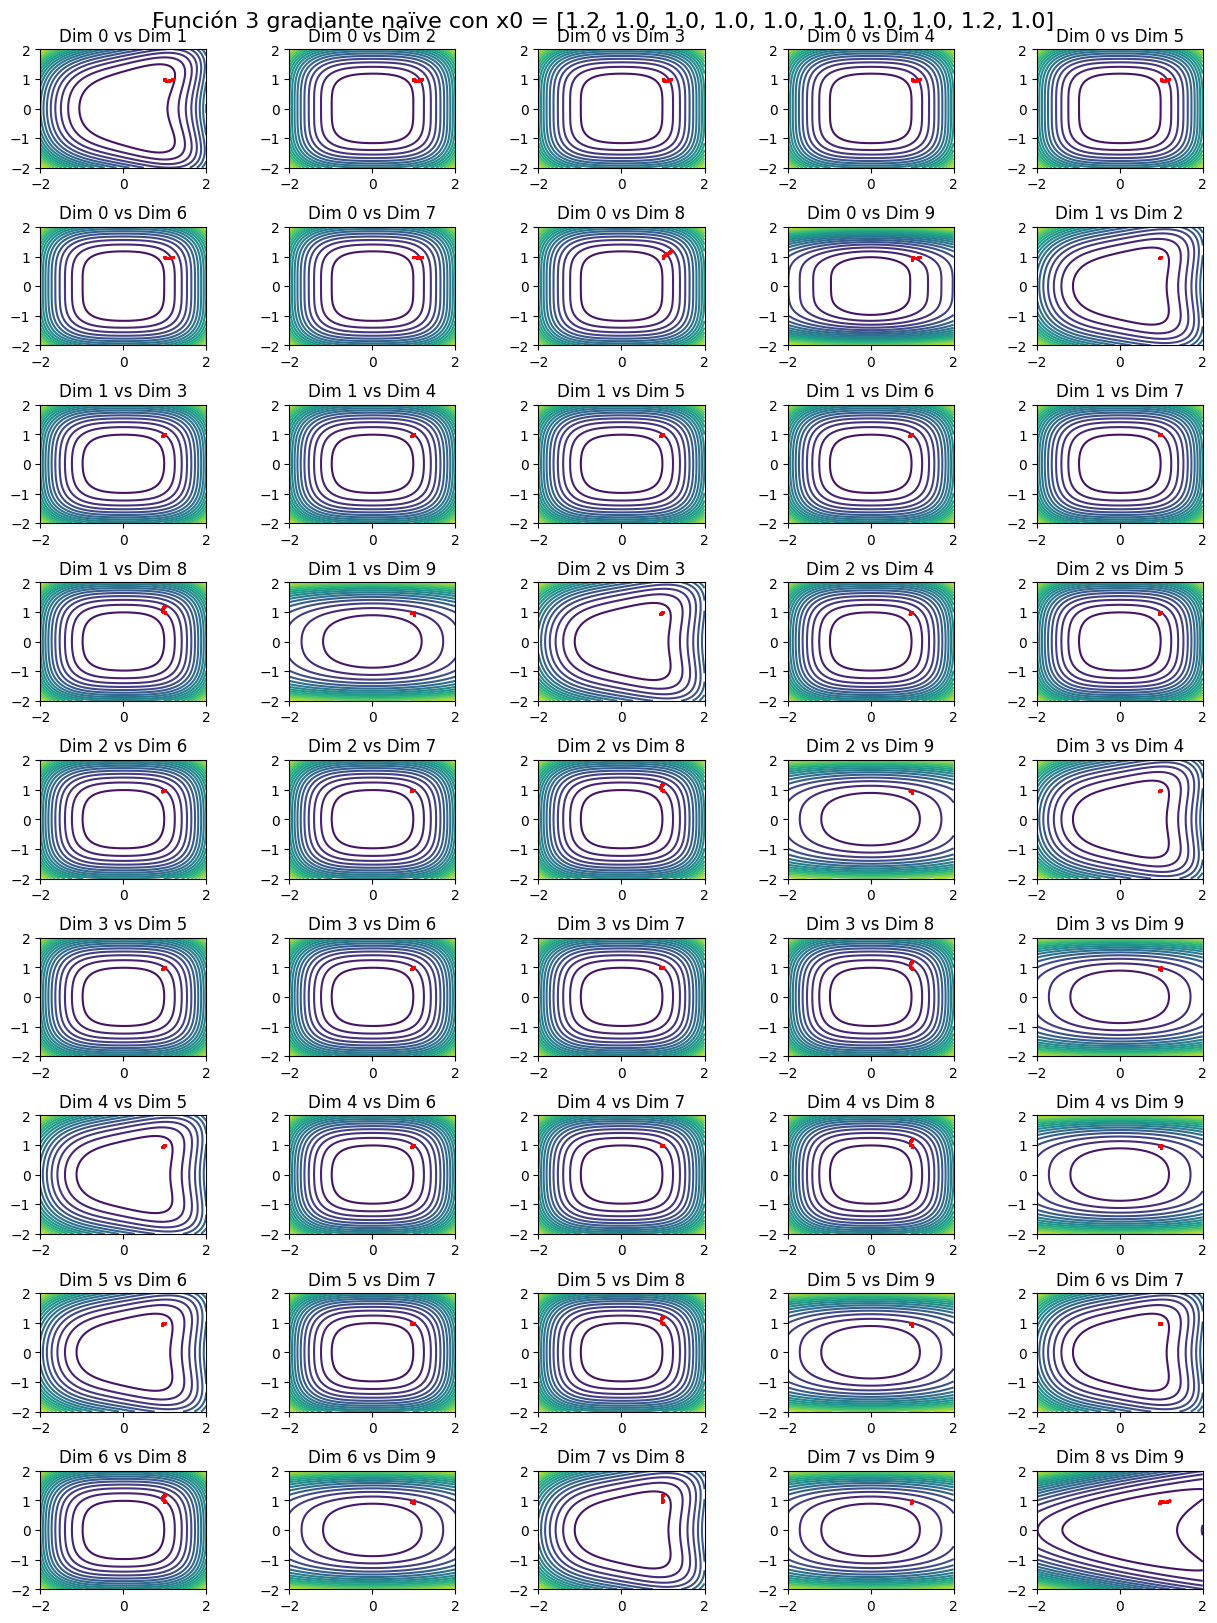

In [255]:
# Generate a grid of points for each pair of dimensions (10 choose 2 = 45 pairs)
pairs = [(i, j) for i in range(10) for j in range(i+1, 10)]

# Create subplots for each pair of dimensions
fig, axes = plt.subplots(9, 5, figsize=(15, 20))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.ravel()

for i, (dim1, dim2) in enumerate(pairs):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for j in range(len(x)):
        for k in range(len(y)):
            point = np.zeros(10)
            point[dim1] = x[j]
            point[dim2] = y[k]
            Z[j, k] = f_3(point)

    axes[i].contour(X, Y, Z, levels=20)
    axes[i].set_title(f'Dim {dim1} vs Dim {dim2}')

    if len(f_iter_seq_f_3) > 0:
        x_points = [point[dim1] for point in f_iter_seq_f_3]
        y_points = [point[dim2] for point in f_iter_seq_f_3]
        axes[i].plot(x_points, y_points, 'ro', markersize=0.5)
plt.suptitle('Función 3 gradiante naïve con x0 = [1.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.2, 1.0]', fontsize=16, y=0.9)
plt.show()

**B) Algoritmo de descenso máximo naïve**

In [161]:
def gradient_descent_steepest(f, df, x0, alpha, max_iterations=1000, tolerance=1e-4):
    x = x0
    iter = 0
    val = 'NO'
    best_x = x
    f_iter_seq= [x]
    f_x_iter_seq = [f(x)]
    error_seq = [0]

    while iter < max_iterations:
        gradient = df(x)
        normalized_gradient = df(x) / np.linalg.norm(df(x))
        descent_direction = -normalized_gradient
        x_next = x + alpha * descent_direction
        f_iter_seq.append(x_next)
        f_x_iter_seq.append(f(x_next))
        error_seq.append(np.linalg.norm(gradient))
        
        if np.linalg.norm(df(x_next)) < np.linalg.norm(df(x)):
            best_x = x_next
            
        if np.linalg.norm(gradient) < tolerance:
            best_x = x_next
            val = 'SÍ'
            break

        x = x_next
        iter += 1
 
    print('Número de iteraciones = '+str(iter), '\nEl algoritmo ' + val + ' convergió')
    print('Vector seleccionado: '+str(best_x))
    print('Valor mínimo alcanzado: ' + str(f(best_x)))
    print('Error mínimo alcanzado: ' + str(error_seq[-1]))
    return best_x, f_iter_seq, f_x_iter_seq, error_seq

In [178]:
best_x_f_1_a_max, f_iter_seq_f_1_a_max, f_x_iter_seq_f_1_a_max, \
    error_seq_f_1_a_max = gradient_descent_steepest(f=f_1,df=df_1, x0=f_1_a_initial_guess, alpha=0.001, max_iterations=10000, tolerance=1e-2)

Número de iteraciones = 2063 
El algoritmo SÍ convergió
Vector seleccionado: [0.98278454 0.94988637]
Valor mínimo alcanzado: -0.5121786744621846
Error mínimo alcanzado: 0.003330809590413588


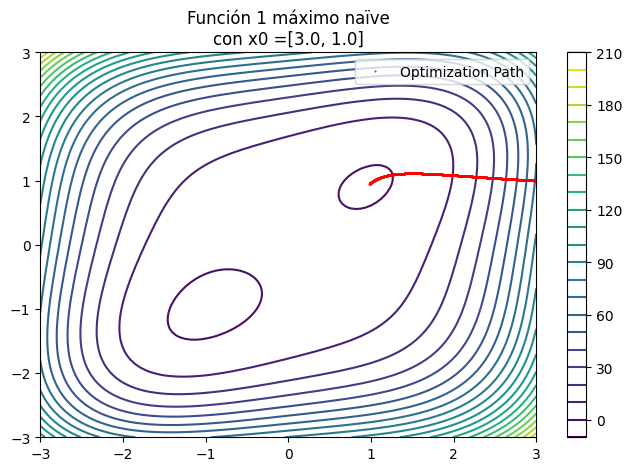

In [188]:
plot_function_2d(f_1, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, points=f_iter_seq_f_1_a_max, title='Función 1 máximo naïve\ncon x0 =[3.0, 1.0]')

In [181]:
best_x_f_1_b_max, f_iter_seq_f_1_b_max, f_x_iter_seq_f_1_b_max, \
    error_seq_f_1_b_max = gradient_descent_steepest(f=f_1,df=df_1, x0=f_1_b_initial_guess, alpha=0.001, max_iterations=10000, tolerance=1e-2)

Número de iteraciones = 3669 
El algoritmo SÍ convergió
Vector seleccionado: [-1.01453675 -1.04444692]
Valor mínimo alcanzado: -1.5113193807861456
Error mínimo alcanzado: 0.00977463916505493


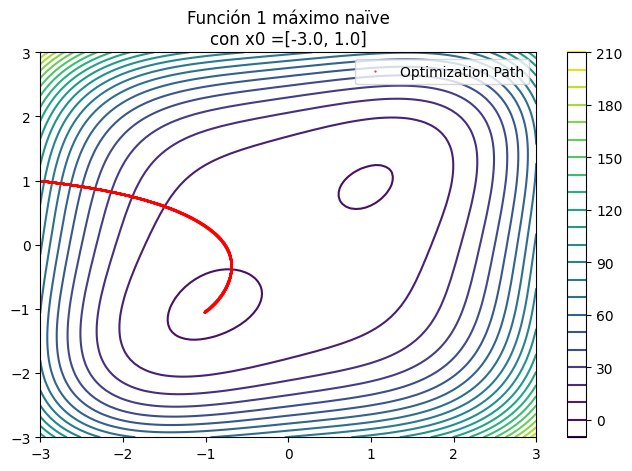

In [189]:
plot_function_2d(f_1, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, points=f_iter_seq_f_1_b_max, title='Función 1 máximo naïve\ncon x0 =[-3.0, 1.0]')

In [214]:
best_x_f_2_max, f_iter_seq_f_2_max, f_x_iter_seq_f_2_max, \
    error_seq_f_2_max = gradient_descent_steepest(f_2, df_2, f_2_initial_guess, alpha=0.01, max_iterations=100000, tolerance=1e-1)

Número de iteraciones = 100000 
El algoritmo NO convergió
Vector seleccionado: [0.99554976 0.99332859]
Valor mínimo alcanzado: 0.0005078877837216011
Error mínimo alcanzado: 9.052731592480642


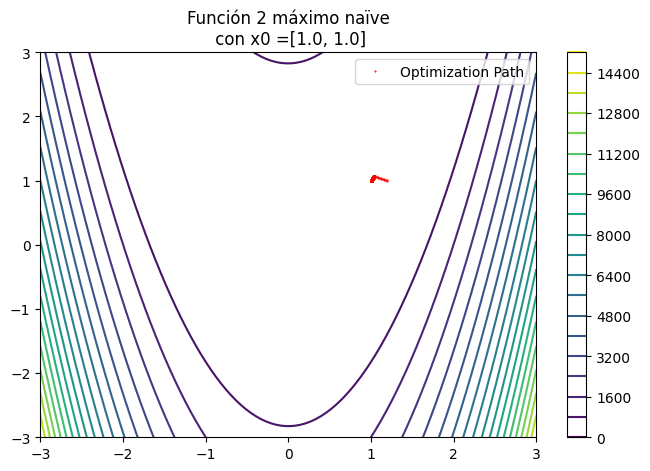

In [215]:
plot_function_2d(f_2, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, points=f_iter_seq_f_2_max, title='Función 2 máximo naïve\n con x0 =[1.0, 1.0]')

In [253]:
best_x_f_3_max, f_iter_seq_f_3_max, f_x_iter_seq_f_3_max, \
    error_seq_f_3_max = gradient_descent_steepest(f_3, df_3, f_3_initial_guess, f_3_step_rate, f_3_max_iterations, tolerance=0.4)

Número de iteraciones = 280 
El algoritmo SÍ convergió
Vector seleccionado: [1.00035567 1.00041768 1.00061859 1.00091413 1.00177382 1.00408436
 1.00885558 1.01784908 1.03579474 1.07299725]
Valor mínimo alcanzado: 0.001803990493387015
Error mínimo alcanzado: 0.2698367540467504


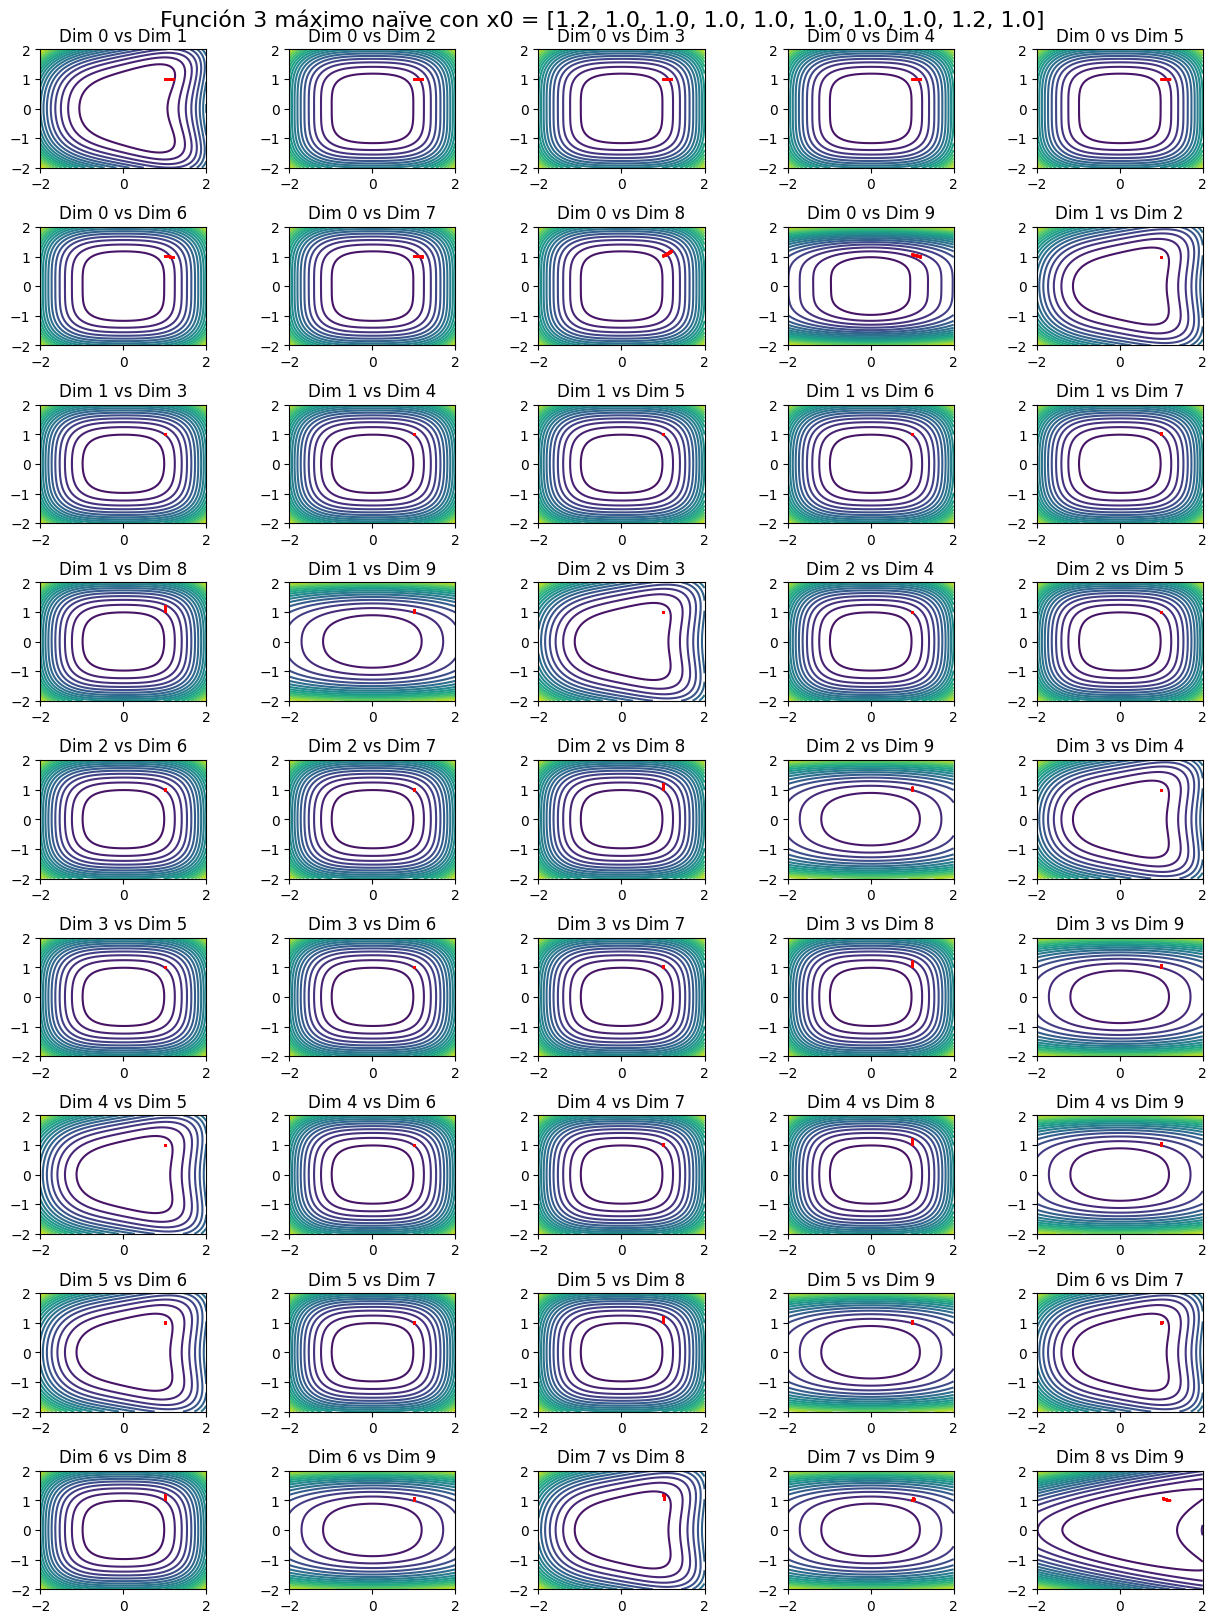

In [220]:
# Generate a grid of points for each pair of dimensions (10 choose 2 = 45 pairs)
pairs = [(i, j) for i in range(10) for j in range(i+1, 10)]

# Create subplots for each pair of dimensions
fig, axes = plt.subplots(9, 5, figsize=(15, 20))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.ravel()

for i, (dim1, dim2) in enumerate(pairs):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for j in range(len(x)):
        for k in range(len(y)):
            point = np.zeros(10)
            point[dim1] = x[j]
            point[dim2] = y[k]
            Z[j, k] = f_3(point)

    axes[i].contour(X, Y, Z, levels=20)
    axes[i].set_title(f'Dim {dim1} vs Dim {dim2}')

    if len(f_iter_seq_f_3) > 0:
        x_points = [point[dim1] for point in f_iter_seq_f_3_max]
        y_points = [point[dim2] for point in f_iter_seq_f_3_max]
        axes[i].plot(x_points, y_points, 'ro', markersize=0.5)
plt.suptitle('Función 3 máximo naïve con x0 = [1.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.2, 1.0]', fontsize=16, y=0.9)
plt.show()

**C) Algoritmo de descenso con Backtracking**

In [266]:
def backtracking_line_search(f, df, x_k, d_k, alpha_0=1, c1=1e-4, c2=0.9, rho=0.1):
    if not (0 < c1 < 1):
        print('Error: La constante c1 debe estar entre 0 y 1')
        return None

    if not (0 < c2 < 1):
        print('Error: La constante c2 debe estar entre 0 y 1')
        return None

    if not (0 < rho < 1):
        print('Error: La constante rho debe estar entre 0 y 1')
        return None

    alpha = alpha_0
    conditions_met = True  # Inicializamos la variable de control de las condiciones

    while conditions_met:
        x_next = x_k + alpha * d_k
        lhs_c1 = f(x_next)
        rhs_c1 = f(x_k) + c1 * alpha * np.dot(df(x_k), d_k)
        lhs_c2 = c2 * abs(np.dot(df(x_k), d_k))
        rhs_c2 = abs(np.dot(df(x_next), d_k))

        if lhs_c1 <= rhs_c1 and lhs_c2 <= rhs_c2:
            return alpha

        alpha = rho * alpha
        conditions_met = False  # Cambiamos la variable de control para salir del bucle

    return alpha  # Devolvemos el último valor de alpha cuando las condiciones ya no se cumplen
    
def gradient_descent_with_backtracking(f, df, x0, alpha, c1, c2, rho, max_iterations=1000, tolerance=1e-4):
    x = x0
    iter = 0
    val = 'NO'
    best_x = x
    f_iter_seq = [x]
    f_x_iter_seq = [f(x)]
    error_seq = [np.linalg.norm(df(x))]

    while iter < max_iterations:
        gradient = df(x)
        d_k = -gradient  # Dirección de descenso: opuesta al gradiente

        # Utilizar Backtracking Line Search para encontrar el paso alpha_k
        alpha_k = backtracking_line_search(f, df, x, d_k, alpha, c1, c2, rho)

        x_next = x + alpha_k * d_k
        f_iter_seq.append(x_next)
        f_x_iter_seq.append(f(x_next))
        error_seq.append(np.linalg.norm(gradient))

        if np.linalg.norm(df(x_next)) < tolerance:
            best_x = x_next
            val = 'SÍ'
            break

        x = x_next
        iter += 1
        
    print('Número de iteraciones = ' + str(iter), '\nEl algoritmo ' + val + ' convergió')
    print('Vector seleccionado: ' + str(best_x))
    print('Valor mínimo alcanzado: ' + str(f(best_x)))
    print('Error mínimo alcanzado: ' + str(error_seq[-1]))

    return best_x, f_iter_seq, f_x_iter_seq, error_seq

In [275]:
best_x_f_1_c, f_iter_seq_f_1_c, f_x_iter_seq_f_1_c, \
    error_seq_f_1_c = gradient_descent_with_backtracking(f_1, df_1, f_1_b_initial_guess, alpha = f_1_step_rate, 
                                                         c1=1e-4, c2=0.9,rho=0.1, 
                                                         max_iterations=f_1_max_iterations, tolerance=f_1_b_tolerance)

Número de iteraciones = 249 
El algoritmo SÍ convergió
Vector seleccionado: [-1.01462007 -1.04452279]
Valor mínimo alcanzado: -1.511319447162982
Error mínimo alcanzado: 0.00010803324957101091


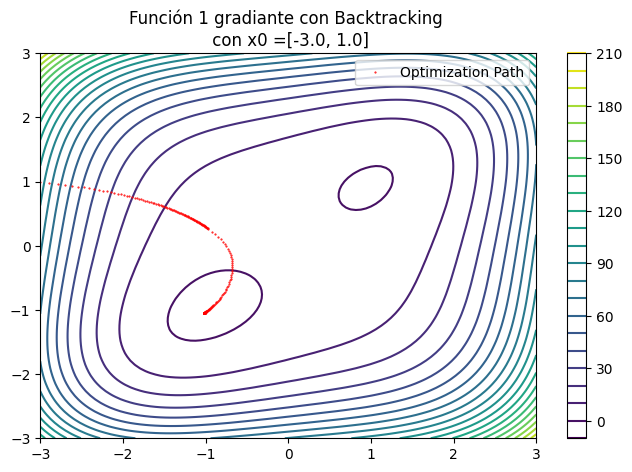

In [277]:
plot_function_2d(f_1, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_1_c, title='Función 1 gradiante con Backtracking \n con x0 =[-3.0, 1.0]')

In [278]:
best_x_f_2_c, f_iter_seq_f_2_c, f_x_iter_seq_f_2_c, \
    error_seq_f_2_c = gradient_descent_with_backtracking(f_2, df_2, f_2_initial_guess, f_2_step_rate, c1=1e-4, c2=0.9,rho=0.1,
                                                         max_iterations=f_2_max_iterations, tolerance=f_2_tolerance)

Número de iteraciones = 425 
El algoritmo SÍ convergió
Vector seleccionado: [1.01126454 1.02270006]
Valor mínimo alcanzado: 0.00012708425583048252
Error mínimo alcanzado: 0.010024013979395115


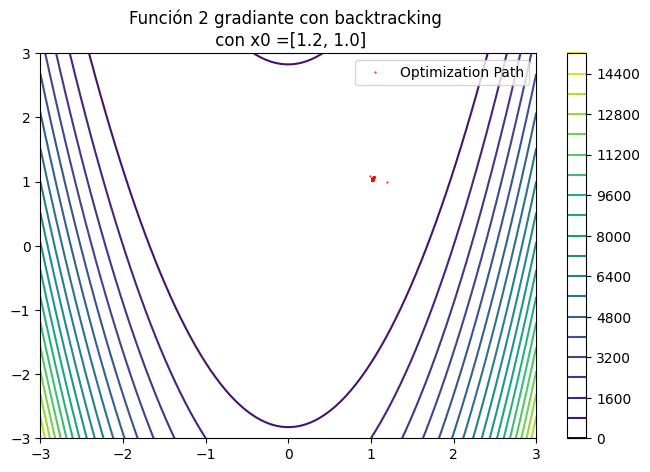

In [279]:
plot_function_2d(f_2, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_2_c, title='Función 2 gradiante con backtracking \n con x0 =[1.2, 1.0]')

In [280]:
best_x_f_3_c, f_iter_seq_f_3_c, f_x_iter_seq_f_3_c, \
    error_seq_f_3_c = gradient_descent_with_backtracking(f_3, df_3, f_3_initial_guess, f_3_step_rate,  c1=1e-4, c2=0.9,rho=0.1,
                                                         max_iterations=f_3_max_iterations, tolerance=f_3_tolerance)

Número de iteraciones = 14805 
El algoritmo SÍ convergió
Vector seleccionado: [1.00000042 1.00000083 1.00000167 1.00000335 1.00000671 1.00001345
 1.00002696 1.00005402 1.00010826 1.00021697]
Valor mínimo alcanzado: 1.5631092421994077e-08
Error mínimo alcanzado: 0.00010001070540573002


**D) Algoritmo de descenso de Newton, con Hessiano aproximado**

In [282]:
def isPSD(A):
    autovalores, autovectores = np.linalg.eig(A)
    return all(autovalores > 0)

def nearPSD(A, epsilon=1e-6):
    if isPSD(A):
        return A

    if not (A == A.T).all():
        raise ValueError("La matriz no es simétrica.")

    autovalores, autovectores = np.linalg.eigh(A)
    # Si un autovalor es negativo, devolver el epsilon
    autovalores_positivos = np.maximum(autovalores, epsilon)
    # Reconstruir A haciéndolo positivo definida
    A_positiva_definida = autovectores.dot(np.diag(autovalores_positivos)).dot(autovectores.T)

    return A_positiva_definida

In [287]:
def gradient_descent_with_approximate_hessian(f, df, d2f, x0, max_iterations=1000, tolerance=1e-4):
    x = x0
    iter = 0
    val = 'NO'
    best_x = x
    f_iter_seq = [x]
    f_x_iter_seq = [f(x)]
    error_seq = [np.linalg.norm(df(x))]

    while iter < max_iterations:
        gradient = df(x)
        # Dirección de descenso opuesta al gradiente
        d_k = -gradient
        
        # Comprobar si la matriz Hessiana es positivamente definida usando la función nearPSD
        hessian = d2f(x)
        if not isPSD(hessian):
            # Aproximación de Hessiano positivamente definida (puede requerir ajustes)
            hessian = nearPSD(hessian)

        # Calcular alpha_k
        numerador = np.dot(gradient, gradient)
        denominador = np.dot(gradient, np.dot(hessian, gradient))
        alpha_k = numerador / denominador

        x_next = x + alpha_k * d_k
        f_iter_seq.append(x_next)
        f_x_iter_seq.append(f(x_next))
        error_seq.append(np.linalg.norm(gradient))

        if np.linalg.norm(df(x_next)) < tolerance:
            best_x = x_next
            val = 'SÍ'
            break

        x = x_next
        iter += 1

    print('Número de iteraciones = ' + str(iter), '\nEl algoritmo ' + val + ' convergió')
    print('Vector seleccionado: ' + str(best_x))
    print('Valor mínimo alcanzado: ' + str(f(best_x)))
    print('Error mínimo alcanzado: ' + str(error_seq[-1]))

    return best_x, f_iter_seq, f_x_iter_seq, error_seq

In [290]:
best_x_f_1_d, f_iter_seq_f_1_d, f_x_iter_seq_f_1_d, \
    error_seq_f_1_d = gradient_descent_with_approximate_hessian(f_1, df_1, ddf_1, f_1_b_initial_guess, 
                                                         max_iterations=f_1_max_iterations, tolerance=1e-6)

Número de iteraciones = 17 
El algoritmo SÍ convergió
Vector seleccionado: [-1.01462844 -1.04453039]
Valor mínimo alcanzado: -1.5113194477216458
Error mínimo alcanzado: 1.7863261494968073e-06


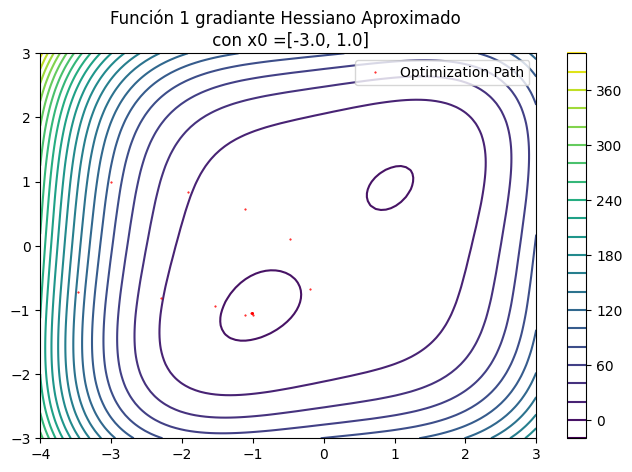

In [292]:
plot_function_2d(f_1, x_range=(-4, 3), y_range=(-3, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_1_d, title='Función 1 gradiante Hessiano Aproximado \n con x0 =[-3.0, 1.0]')

In [293]:
best_x_f_1_d, f_iter_seq_f_1_d, f_x_iter_seq_f_1_d, \
    error_seq_f_1_d = gradient_descent_with_approximate_hessian(f_1, df_1, ddf_1, f_1_a_initial_guess, 
                                                         max_iterations=f_1_max_iterations, tolerance=1e-6)

Número de iteraciones = 14 
El algoritmo SÍ convergió
Vector seleccionado: [0.98314566 0.95028455]
Valor mínimo alcanzado: -0.5121797144430391
Error mínimo alcanzado: 3.5364294665788645e-06


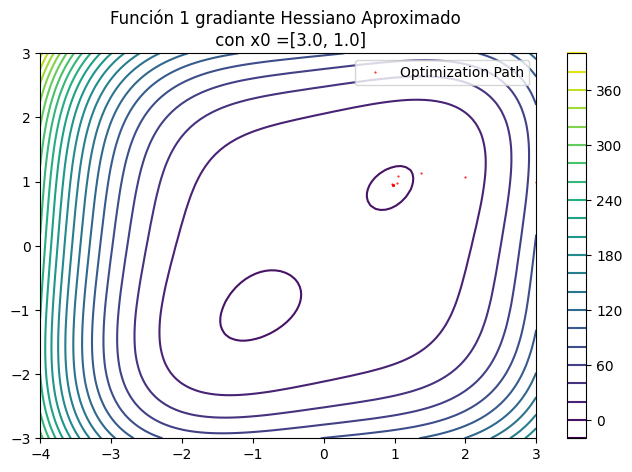

In [294]:
plot_function_2d(f_1, x_range=(-4, 3), y_range=(-3, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_1_d, title='Función 1 gradiante Hessiano Aproximado \n con x0 =[3.0, 1.0]')

In [295]:
best_x_f_2_d, f_iter_seq_f_2_d, f_x_iter_seq_f_2_d, \
    error_seq_f_2_d = gradient_descent_with_approximate_hessian(f_2, df_2, ddf_2, f_2_initial_guess,
                                                         max_iterations=f_2_max_iterations, tolerance=f_2_tolerance)

Número de iteraciones = 6 
El algoritmo SÍ convergió
Vector seleccionado: [1.01115155 1.02246988]
Valor mínimo alcanzado: 0.00012453704109855908
Error mínimo alcanzado: 0.11645721858319913


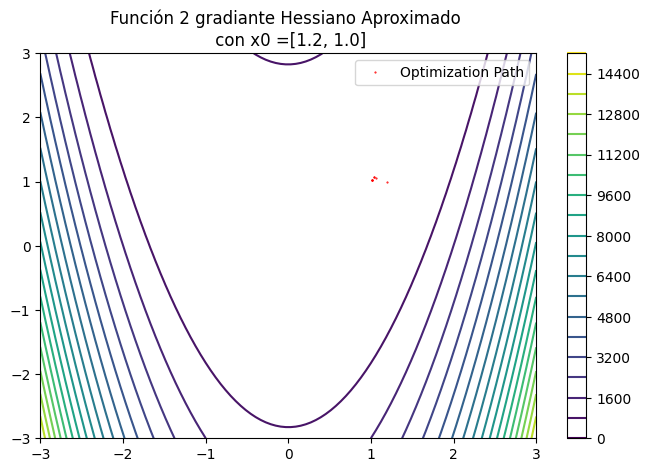

In [296]:
plot_function_2d(f_2, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_2_d, title='Función 2 gradiante Hessiano Aproximado \n con x0 =[1.2, 1.0]')

In [297]:
best_x_f_3_d, f_iter_seq_f_3_d, f_x_iter_seq_f_3_d, \
    error_seq_f_3_d = gradient_descent_with_approximate_hessian(f_3, df_3, ddf_3, f_3_initial_guess,
                                                         max_iterations=f_3_max_iterations, tolerance=f_3_tolerance)

Número de iteraciones = 2493 
El algoritmo SÍ convergió
Vector seleccionado: [1.00000042 1.00000081 1.00000165 1.0000033  1.00000661 1.00001325
 1.00002656 1.00005322 1.00010666 1.00021376]
Valor mínimo alcanzado: 1.5172513589433324e-08
Error mínimo alcanzado: 0.0001312173810151395


**E) Algoritmo de descenso de Newton, con Hessiano exacto**

In [305]:
def gradient_descent_with_exact_hessian(f, df, ddf, x0, alpha=1, max_iterations=1000, tolerance=1e-4):
    x = x0
    iter = 0
    val = 'NO'
    best_x = x
    f_iter_seq = [x]
    f_x_iter_seq = [f(x)]
    error_seq = [np.linalg.norm(df(x))]

    while iter < max_iterations:
        gradient = df(x)

        # Calcular la dirección de descenso utilizando el Hessiano exacto
        try:
            hessian_inv = np.linalg.inv(ddf(x))
        except np.linalg.LinAlgError:
            raise ValueError("No es posible computar debido a que la hessiana no es positivo-definida")

        d_k = -np.dot(hessian_inv, gradient)

        x_next = x + alpha * d_k
        f_iter_seq.append(x_next)
        f_x_iter_seq.append(f(x_next))
        error_seq.append(np.linalg.norm(gradient))

        if np.linalg.norm(df(x_next)) < tolerance:
            best_x = x_next
            val = 'SÍ'
            break

        x = x_next
        iter += 1

    print('Número de iteraciones = ' + str(iter), '\nEl algoritmo ' + val + ' convergió')
    print('Vector seleccionado: ' + str(best_x))
    print('Valor mínimo alcanzado: ' + str(f(best_x)))
    print('Error mínimo alcanzado: ' + str(error_seq[-1]))
    
    return best_x, f_iter_seq, f_x_iter_seq, error_seq

In [314]:
best_x_f_1_e, f_iter_seq_f_1_e, f_x_iter_seq_f_1_e, \
    error_seq_f_1_e = gradient_descent_with_exact_hessian(f_1, df_1, ddf_1, f_1_b_initial_guess, alpha=0.01, 
                                                         max_iterations=f_1_max_iterations, tolerance=1e-6)

Número de iteraciones = 1896 
El algoritmo SÍ convergió
Vector seleccionado: [-1.01462844 -1.04453049]
Valor mínimo alcanzado: -1.5113194477216174
Error mínimo alcanzado: 1.008626485030793e-06


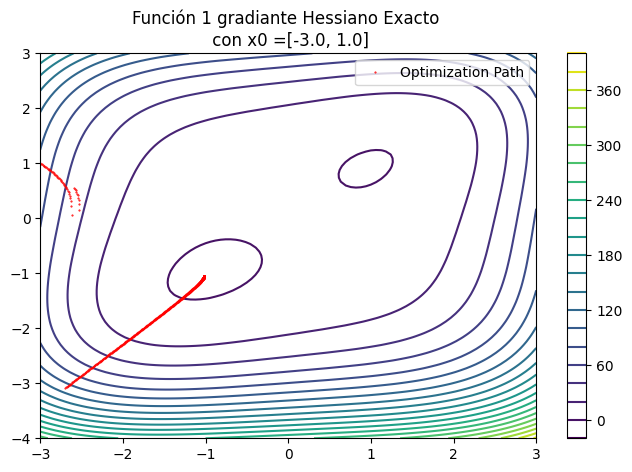

In [317]:
plot_function_2d(f_1, x_range=(-3, 3), y_range=(-4, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_1_e, title='Función 1 gradiante Hessiano Exacto \n con x0 =[-3.0, 1.0]')

In [318]:
best_x_f_1_e, f_iter_seq_f_1_e, f_x_iter_seq_f_1_e, \
    error_seq_f_1_e = gradient_descent_with_exact_hessian(f_1, df_1, ddf_1, f_1_a_initial_guess, alpha=0.05, 
                                                         max_iterations=f_1_max_iterations, tolerance=1e-6)

Número de iteraciones = 309 
El algoritmo SÍ convergió
Vector seleccionado: [0.98314572 0.95028449]
Valor mínimo alcanzado: -0.5121797144430198
Error mínimo alcanzado: 1.0321995108753187e-06


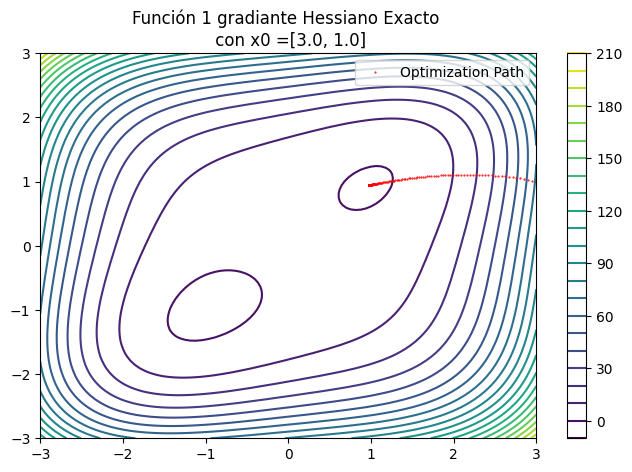

In [320]:
plot_function_2d(f_1, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_1_e, title='Función 1 gradiante Hessiano Exacto \n con x0 =[3.0, 1.0]')

In [322]:
best_x_f_2_e, f_iter_seq_f_2_e, f_x_iter_seq_f_2_e, \
    error_seq_f_2_e = gradient_descent_with_exact_hessian(f_2, df_2, ddf_2, f_2_initial_guess, alpha=1,
                                                         max_iterations=f_2_max_iterations, tolerance=f_2_tolerance)

Número de iteraciones = 2 
El algoritmo SÍ convergió
Vector seleccionado: [1.00017686 1.00035376]
Valor mínimo alcanzado: 3.128105344028598e-08
Error mínimo alcanzado: 17.456682316529506


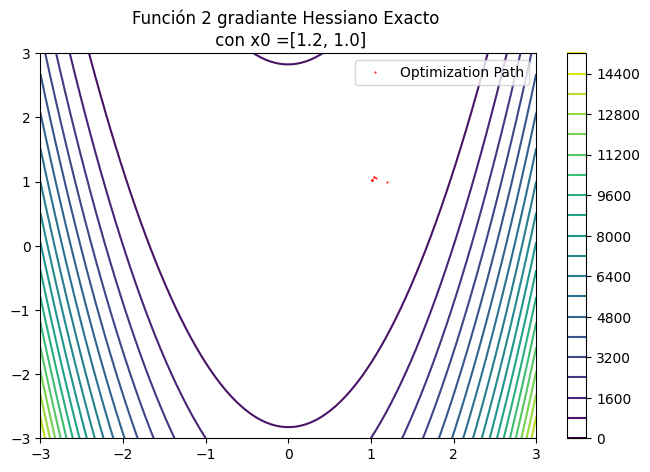

In [323]:
plot_function_2d(f_2, x_range=(-3, 3), y_range=(-3, 3), figsize=(8,5), show=True, 
                 points=f_iter_seq_f_2_d, title='Función 2 gradiante Hessiano Exacto \n con x0 =[1.2, 1.0]')

In [325]:
best_x_f_3_e, f_iter_seq_f_3_e, f_x_iter_seq_f_3_e, \
    error_seq_f_3_e = gradient_descent_with_exact_hessian(f_3, df_3, ddf_3, f_3_initial_guess, alpha=1,
                                                         max_iterations=f_3_max_iterations, tolerance=f_3_tolerance)

Número de iteraciones = 100000 
El algoritmo NO convergió
Vector seleccionado: [1.2 1.  1.  1.  1.  1.  1.  1.  1.2 1. ]
Valor mínimo alcanzado: 42.79999999999998
Error mínimo alcanzado: 2355.228915575101
